<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetic/blob/lesson5/GB_molecular_Biology_Genetics_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Урок 5. Секвенирование
Установите UGENE.

Посредством NCBI скачайте геном референсной последовательности (желательно бактериальной), риды, и попробуйте выполнить следующие операции:

 ● проверить качество ридов;

 ● провести выравнивание ридов на геном. Предоставьте файл с проверкой качества в формате .html и файл с выравниванием в формате .sam.

Рассмотрим исследование
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125633

Организм: Escherichia coli O157:H7 str. Sakai

Качаем риды с https://www.ebi.ac.uk/ena/browser/view/PRJNA516945 .

Требуемая референсная последовательность: https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2

Assembly: https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/008/865/GCF_000008865.2_ASM886v2/

Все изначальные файлы скачаны и положены на гугл диск. Попытаемся сделать выравнивание без использования UGENE.

Установим необходимые библиотеки.

In [ ]:
# !sudo apt -qq install bwa samtools fastqc bowtie gffread
!sudo apt -qq install bwa samtools fastqc bowtie gffread > /dev/null



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 129.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


# Ранее полученные файлы.

Здесь можно просто подгрузить результаты, которые получил в прошлых запусках. Будет подгружена папка previous_outputs. В папке ней доступно 3 папки с результатами от разных тулов. Получение файлов, описание результатов и выводы по этим данным описаны в ходе работы ниже. Для скачивания нужно раскомментить строку и запустить ячейку.


In [ ]:
# !gdown '1ioudLl9mhJHcGyAddjjCixxogZd3TTbu'
# !unzip previous_outputs.zip

# Загрузка данных.

Скачиваем ранее загруженные риды и разархивируем.

In [ ]:
!gdown '1R4MdFr8PYqdrOsQafNaCyw3XptbgDc8-'
!gunzip SRR8485398_1.fastq.gz
reads = '/content/SRR8485398_1.fastq'

Downloading...
From: https://drive.google.com/uc?id=1R4MdFr8PYqdrOsQafNaCyw3XptbgDc8-
To: /content/SRR8485398_1.fastq.gz
100% 313M/313M [00:02<00:00, 117MB/s]


Скачиваем ранее загруженную референсную последовательность.

In [ ]:
!gdown '1tY5wKnPxJV3_s4ASmLnTqB5wYlv6Ib4l'
!gunzip GCF_000008865.2_ASM886v2_genomic.fna.gz
reference='/content/GCF_000008865.2_ASM886v2_genomic.fna'

Downloading...
From: https://drive.google.com/uc?id=1tY5wKnPxJV3_s4ASmLnTqB5wYlv6Ib4l
To: /content/GCF_000008865.2_ASM886v2_genomic.fna.gz
100% 1.66M/1.66M [00:00<00:00, 96.9MB/s]


Скачиваем ранее загруженную аннотацию.

In [ ]:
!gdown '1sWC4049d21l93ntWDASbXoInkFaZUfzH'
!gunzip GCF_000008865.2_ASM886v2_genomic.gtf.gz
annotation='/content/GCF_000008865.2_ASM886v2_genomic.gtf'

Downloading...
From: https://drive.google.com/uc?id=1sWC4049d21l93ntWDASbXoInkFaZUfzH
To: /content/GCF_000008865.2_ASM886v2_genomic.gtf.gz
100% 395k/395k [00:00<00:00, 114MB/s]


Какие файлы у нас сейчас есть.

In [ ]:
!ls

GCF_000008865.2_ASM886v2_genomic.fna  sample_data
GCF_000008865.2_ASM886v2_genomic.gtf  SRR8485398_1.fastq


# Оценка качества ридов.
Для этого используем fastqc.

In [ ]:
!mkdir outputs
%cd outputs
!mkdir fastqc
!mkdir baw
# !mkdir STAR
%cd /content/outputs/fastqc
# !ls

/content/outputs
/content/outputs/fastqc


In [ ]:
!fastqc $reads

Started analysis of SRR8485398_1.fastq
Approx 5% complete for SRR8485398_1.fastq
Approx 10% complete for SRR8485398_1.fastq
Approx 15% complete for SRR8485398_1.fastq
Approx 20% complete for SRR8485398_1.fastq
Approx 25% complete for SRR8485398_1.fastq
Approx 30% complete for SRR8485398_1.fastq
Approx 35% complete for SRR8485398_1.fastq
Approx 40% complete for SRR8485398_1.fastq
Approx 45% complete for SRR8485398_1.fastq
Approx 50% complete for SRR8485398_1.fastq
Approx 55% complete for SRR8485398_1.fastq
Approx 60% complete for SRR8485398_1.fastq
Approx 65% complete for SRR8485398_1.fastq
Approx 70% complete for SRR8485398_1.fastq
Approx 75% complete for SRR8485398_1.fastq
Approx 80% complete for SRR8485398_1.fastq
Approx 85% complete for SRR8485398_1.fastq
Approx 90% complete for SRR8485398_1.fastq
Approx 95% complete for SRR8485398_1.fastq
Analysis complete for SRR8485398_1.fastq


In [ ]:
# import IPython
# IPython.display.HTML(filename='/content/SRR8485398_1_fastqc.html')

In [ ]:
# from IPython.display import IFrame
# IFrame(src='/content/SRR8485398_1_fastqc.html', width=900, height=600)

Рассмотрим html отчёт. Он разбит на несколько частей.

In [ ]:
%cd /content

!mv SRR8485398_1_fastqc.zip outputs/fastqc
!mv SRR8485398_1_fastqc.html outputs/fastqc

/content


## **Basic Statistics**
Базовая информация о файле.

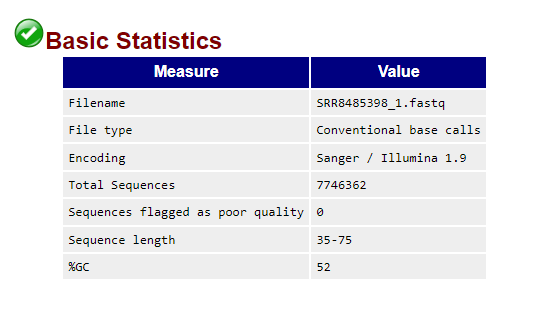

Плохих считываний нет.
Есть разброс в длине ридов.

## **Per base sequence quality**
Статистика качества секвенирования последовательностей.

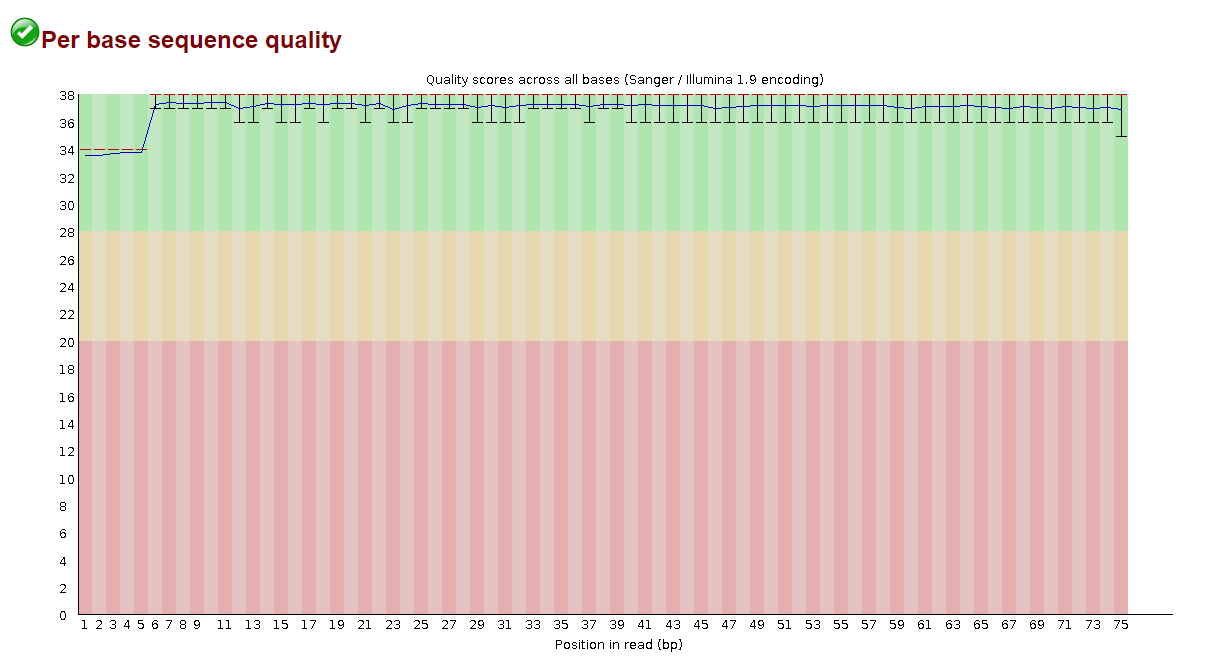

* Горизонтальная ось на этом рисунке - от 1-го основания до 75-го основания последовательности секвенирования.
* По вертикальной оси отложен показатель качества, Q = -10 * log10 (ошибка P) означает, что 20 означает 1% уровень ошибок, 30 означает 0,1%

В принципе, все наши боксплоты лежат в зелёной зоне. Выше 34. Следовательно у нас достаточно качественные риды. Ничего вырезать не требуется.



## **Per sequence quality scores**

Статистика качества секвенирования каждой последовательности. Среднее качество рида.

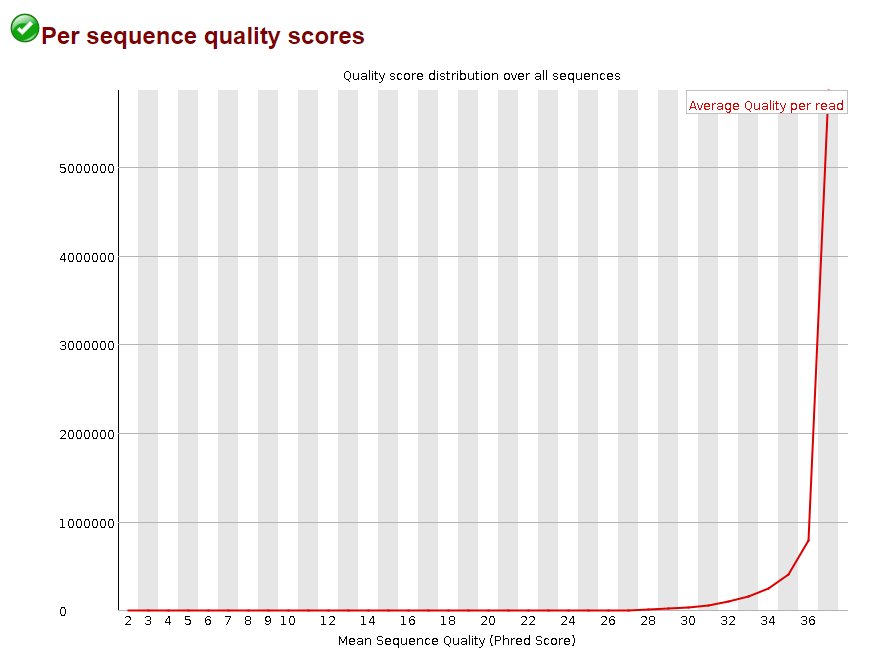

* Горизонтальная ось рисунка 0-40, что указывает значение Q
* Вертикальная ось - это количество чтений, соответствующих каждому значению

Среднее качество у большей части ридов - 37. Результаты секвенирования в основном сосредоточены на высоких баллах, что доказывает хорошее качество секвенирования

## **Per base sequence content**

Нуклеотидный состав по основаниям.

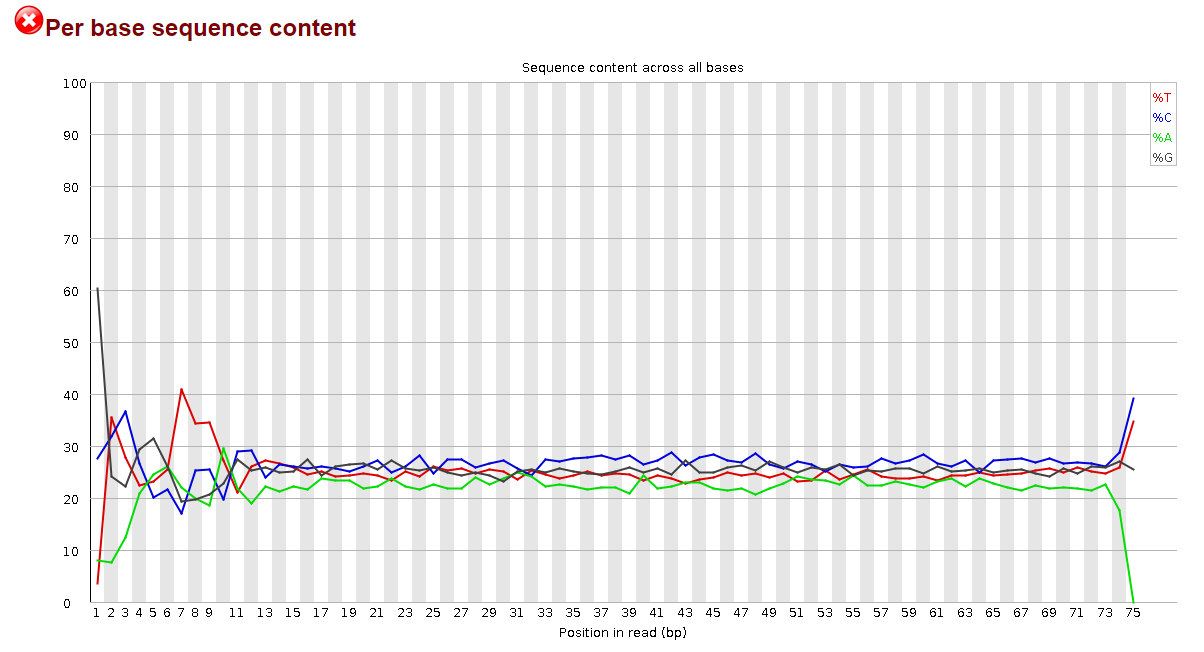

* Горизонтальная ось - 1-75 основания; вертикальная ось - проценты.
* Четыре линии на рисунке представляют среднее содержание A, T, C, G в каждой позиции

Из графика видно, что в начале и в конце последовательностей процент оснований нестабилен. (A != T, G != C). Т.е. в целом я бы вырезал начало до 10 основания и 75 основание.

## **Per sequence GC content**

Гуанин-цитозиновый состав. Карта распределения среднего содержания GC последовательности.

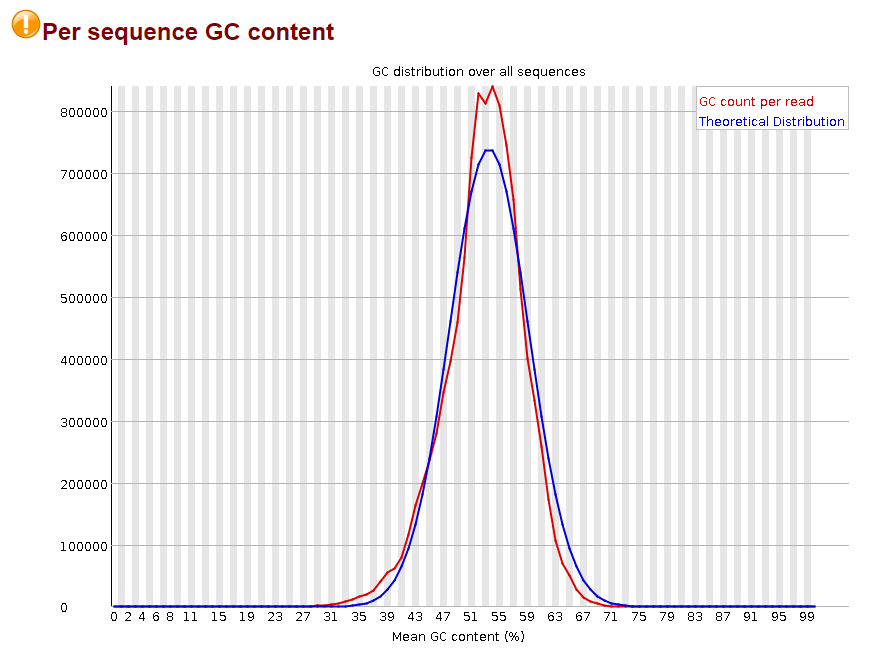

* Горизонтальная ось - 0-100%; вертикальная ось - число, соответствующее содержанию GC каждой последовательности.
* Синяя линия - это теоретическое значение, полученное программой на основе эмпирического распределения, а красная - реальное значение. Эти значения должны быть ближе друг к другу.

Т.к. красная линия имеет двойные пики, это означает, что у нас есть примеси других видов.

## **Per base N content**

Процент непрочитанных оснований.

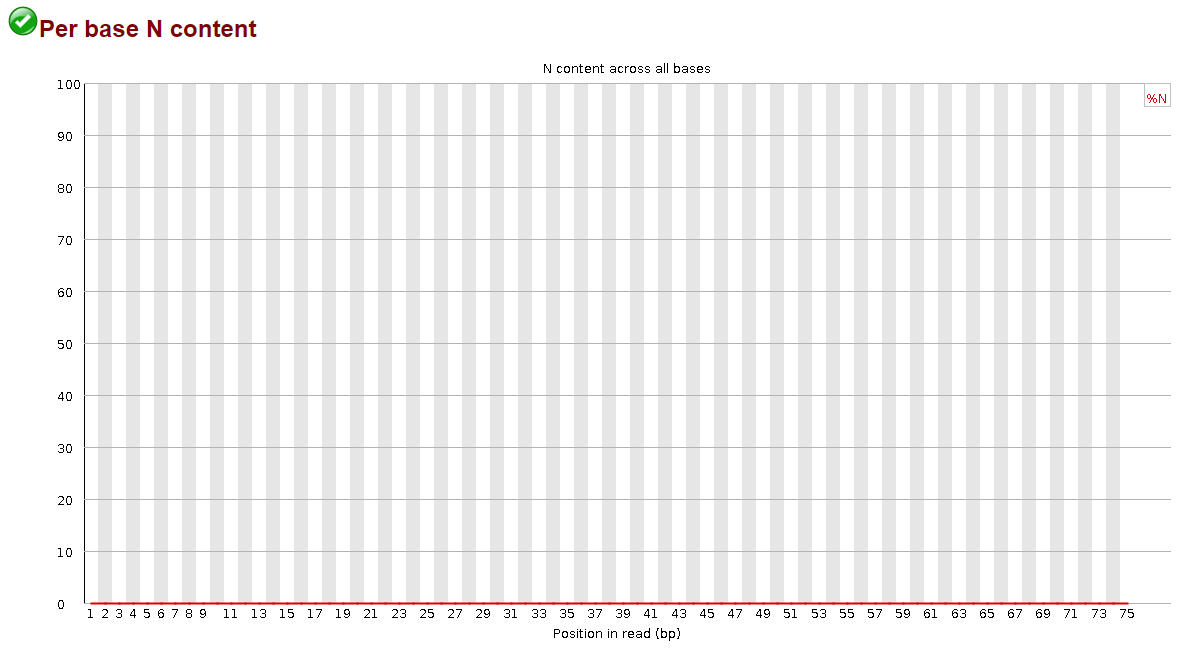

Непрочитанных нет.

## **Sequence Length Distribution**

Распределение длин последовательностей.

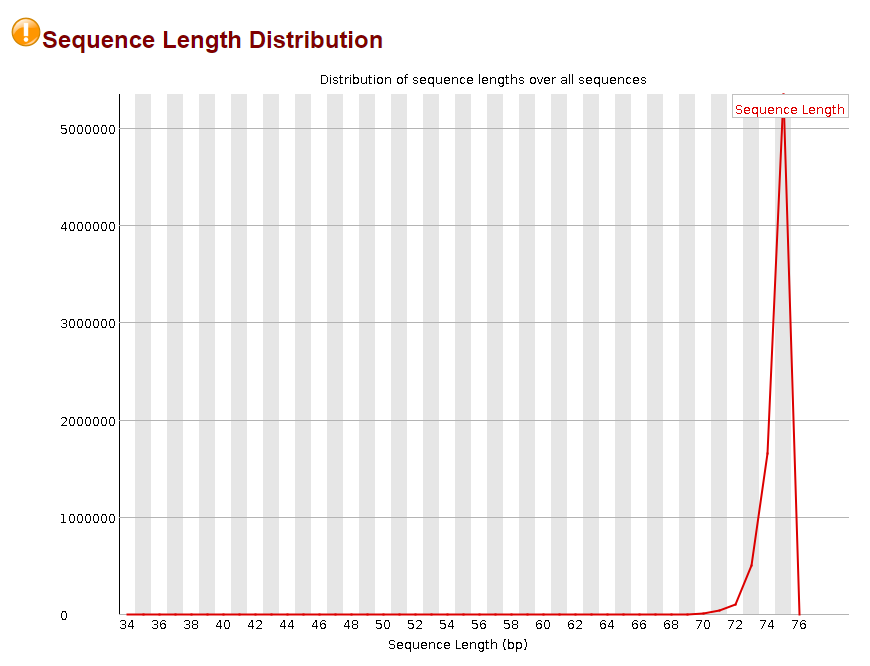

Т.к. длина секвенирования отличается, это означает, что данные, полученные секвенсором во время этого процесса секвенирования, недостоверны.

## **Sequence Duplication Levels**

Уровни дубликации.

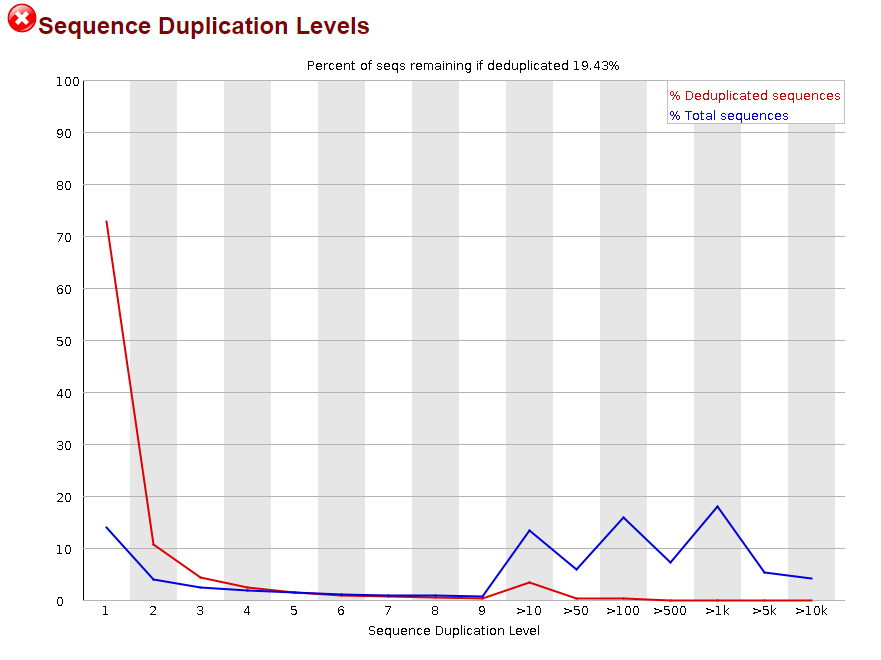

Большой процент ридов повторяется.

## **Overrepresented sequences**

Слишком часто повторяющиеся последовательности в ридах.

Часть таблицы

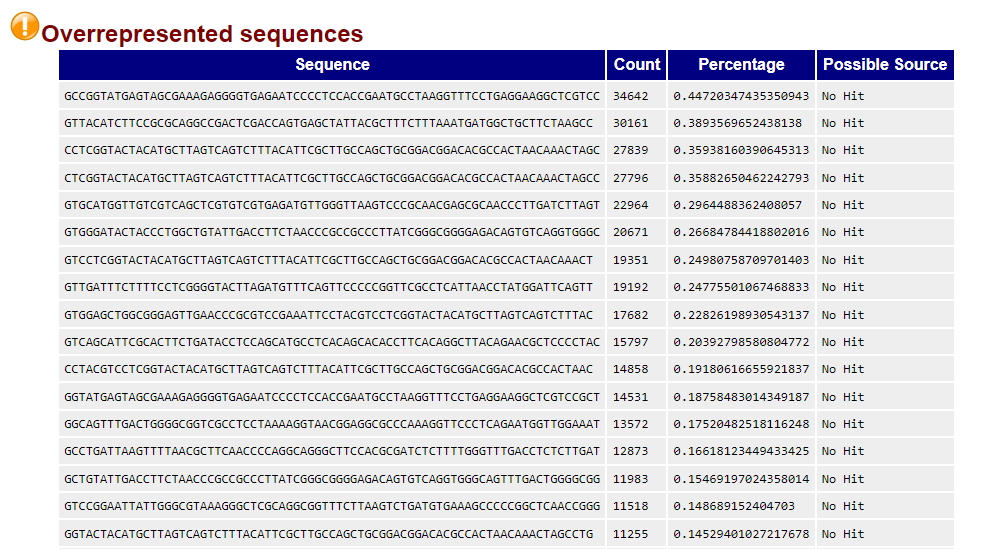

Рассмотрим, например, первую последовательность в BLAST.

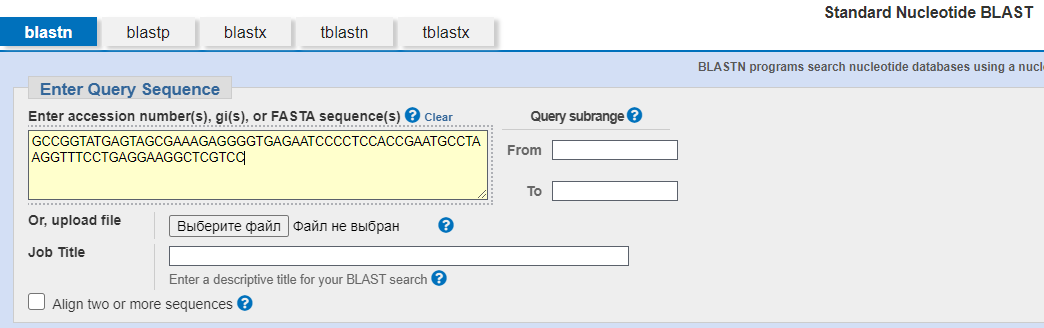

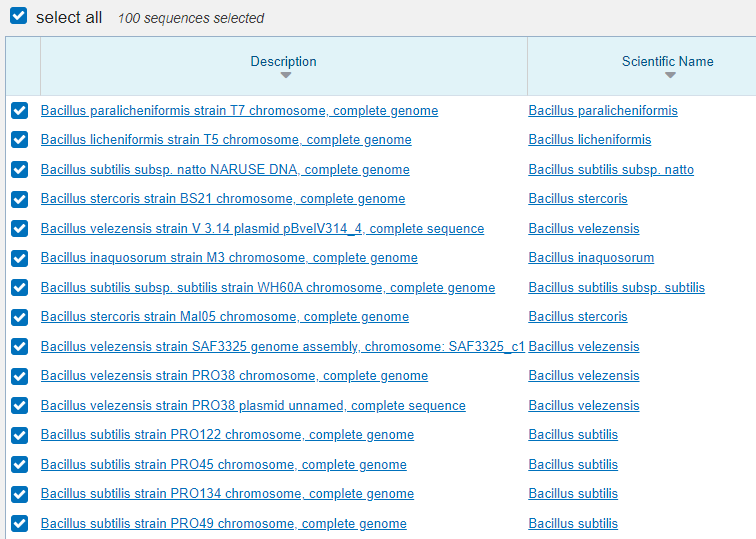

Видимо у нас есть загразнение другим организмом.



Впрочем, возможен вариант, что т.к. данная рнк-последовательность была получена под воздействием сублетального уровня антимикробного вещества. И возможно, что я неверно трактую результаты эксперимента.

## **Adapter Content**

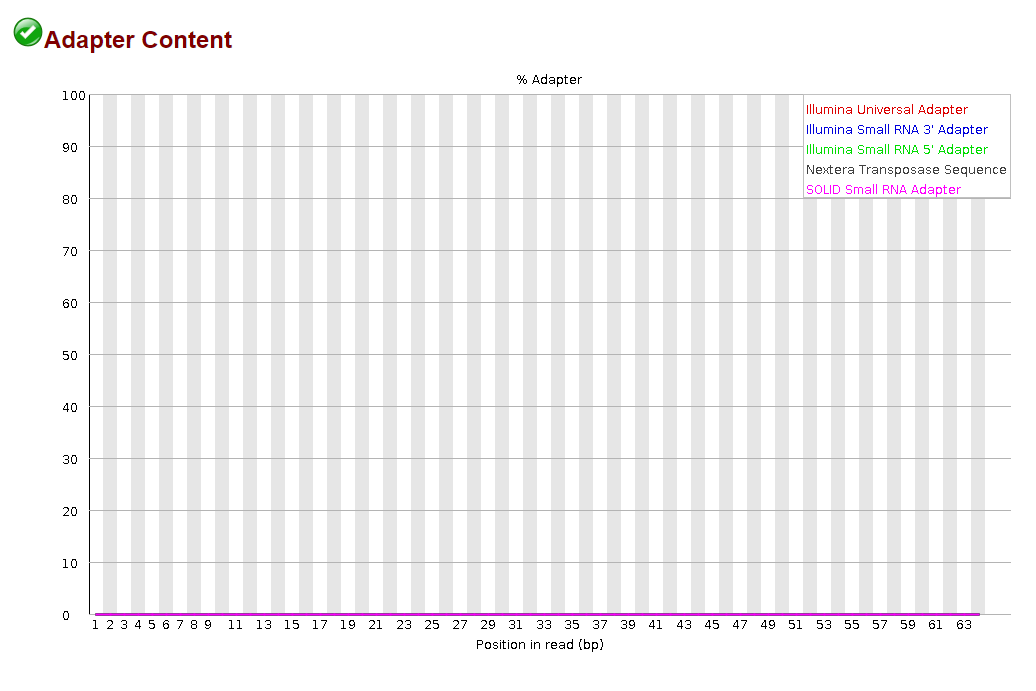

На этом рисунке показано положение адаптеров на обоих концах последовательности.

У нас адаптеры удалёны.

# Выравнивание.

## BWA

### generate index for mapping

In [ ]:
%cd /content/outputs/baw

/content/outputs/baw


In [ ]:
!bwa index $reference > /dev/null

[bwa_index] Pack FASTA... 0.05 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 3.16 seconds elapse.
[bwa_index] Update BWT... 0.05 sec
[bwa_index] Pack forward-only FASTA... 0.05 sec
[bwa_index] Construct SA from BWT and Occ... 1.80 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/GCF_000008865.2_ASM886v2_genomic.fna
[main] Real time: 5.337 sec; CPU: 5.111 sec


### finally mapping with bwa mem

сравнение данных MEM (maximal exact matches)

Не придумал как убрать логи, поэтому лучше свернуть этот выход.

In [ ]:
!bwa mem $reference $reads > alignment_file.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 134368 sequences (10000036 bp)...
[M::process] read 134342 sequences (10000120 bp)...
[M::mem_process_seqs] Processed 134368 reads in 6.901 CPU sec, 6.819 real sec
[M::process] read 134352 sequences (10000054 bp)...
[M::mem_process_seqs] Processed 134342 reads in 8.366 CPU sec, 8.238 real sec
[M::process] read 134354 sequences (10000052 bp)...
[M::mem_process_seqs] Processed 134352 reads in 6.957 CPU sec, 6.761 real sec
[M::process] read 134346 sequences (10000050 bp)...
[M::mem_process_seqs] Processed 134354 reads in 8.257 CPU sec, 8.138 real sec
[M::process] read 134330 sequences (10000040 bp)...
[M::mem_process_seqs] Processed 134346 reads in 7.104 CPU sec, 6.905 real sec
[M::process] read 134338 sequences (10000140 bp)...
[M::mem_process_seqs] Processed 134330 reads in 8.381 CPU sec, 8.325 real sec
[M::process] read 134360 sequences (10000129 bp)...
[M::mem_process_seqs] Processed 134338 reads in 7.316 CPU sec, 7.141 

### checking quality of mapping with samtools

In [ ]:
!samtools stats alignment_file.sam | head -n 50

# This file was produced by samtools stats (1.10+htslib-1.10.2-3ubuntu0.1) and can be plotted using plot-bamstats
# This file contains statistics for all reads.
# The command line was:  stats alignment_file.sam
# CHK, Checksum	[2]Read Names	[3]Sequences	[4]Qualities
# CHK, CRC32 of reads which passed filtering followed by addition (32bit overflow)
CHK	6c4e68eb	870be239	e99f6975
# Summary Numbers. Use `grep ^SN | cut -f 2-` to extract this part.
SN	raw total sequences:	7746362
SN	filtered sequences:	0
SN	sequences:	7746362
SN	is sorted:	0
SN	1st fragments:	7746362
SN	last fragments:	0
SN	reads mapped:	6408034
SN	reads mapped and paired:	0	# paired-end technology bit set + both mates mapped
SN	reads unmapped:	1338328
SN	reads properly paired:	0	# proper-pair bit set
SN	reads paired:	0	# paired-end technology bit set
SN	reads duplicated:	0	# PCR or optical duplicate bit set
SN	reads MQ0:	2077357	# mapped and MQ=0
SN	reads QC failed:	0
SN	non-primary alignments:	0
SN	total length:	57665100

In [ ]:
# (6408034/7746362)*100


Выводы:

Качество выравнивания плохое. Но как правильно трактовать - не совсем понял.
Исходил, что для большей части последовательностей удалось провести выравнивание.

* SN	raw total sequences:	7746362

  SN	sequences:	7746362

  SN	reads mapped:	6408034

* average quality:	37.0


Вроде бы должен был быть раздел MAPQ, но я его не нашёл.

In [ ]:
# %%shell
# samtools stats  alignment_file.sam > test.stats

# plot-bamstats -p test test.stats

In [ ]:
%cd /content

!mv GCF_000008865.2_ASM886v2_genomic.fna.amb outputs/baw
!mv GCF_000008865.2_ASM886v2_genomic.fna.ann outputs/baw
!mv GCF_000008865.2_ASM886v2_genomic.fna.bwt outputs/baw
!mv GCF_000008865.2_ASM886v2_genomic.fna.pac outputs/baw
!mv GCF_000008865.2_ASM886v2_genomic.fna.sa outputs/baw

/content


## STAR

Установим STAR согласно инструкции
https://github.com/alexdobin/STAR . Также потребуется определить path.

In [ ]:
!wget https://github.com/alexdobin/STAR/archive/2.7.10b.tar.gz
!tar -xzf 2.7.10b.tar.gz
%cd STAR-2.7.10b/source
!make STAR > /dev/null 2>&1
import os
os.environ['PATH'] += ":/content/STAR-2.7.10b/source"

--2023-06-14 06:36:01--  https://github.com/alexdobin/STAR/archive/2.7.10b.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/alexdobin/STAR/tar.gz/refs/tags/2.7.10b [following]
--2023-06-14 06:36:01--  https://codeload.github.com/alexdobin/STAR/tar.gz/refs/tags/2.7.10b
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘2.7.10b.tar.gz’

2.7.10b.tar.gz          [           <=>      ]  11.87M  5.61MB/s    in 2.1s    

2023-06-14 06:36:04 (5.61 MB/s) - ‘2.7.10b.tar.gz’ saved [12443703]

/content/STAR-2.7.10b/source


In [ ]:
# os.environ['PATH']

In [ ]:
# aligning with STAR
# directory where genome indices will be stored
%cd /content
!STAR --runMode genomeGenerate --genomeDir outputs/STAR/genome_indx --genomeFastaFiles $reference

/content
	STAR --runMode genomeGenerate --genomeDir outputs/STAR/genome_indx --genomeFastaFiles /content/GCF_000008865.2_ASM886v2_genomic.fna
	STAR version: 2.7.10b   compiled: 2023-06-14T06:36:40+00:00 6aa7a8f3a6cc:/content/STAR-2.7.10b/source
Jun 14 06:40:50 ..... started STAR run
Jun 14 06:40:50 ... starting to generate Genome files
!!!!! WARNING: --genomeSAindexNbases 14 is too large for the genome size=5594605, which may cause seg-fault at the mapping step. Re-run genome generation with recommended --genomeSAindexNbases 10
Jun 14 06:40:51 ... starting to sort Suffix Array. This may take a long time...
Jun 14 06:40:51 ... sorting Suffix Array chunks and saving them to disk...
Jun 14 06:40:57 ... loading chunks from disk, packing SA...
Jun 14 06:40:57 ... finished generating suffix array
Jun 14 06:40:57 ... generating Suffix Array index
Jun 14 06:41:04 ... completed Suffix Array index
Jun 14 06:41:04 ... writing Genome to disk ...
Jun 14 06:41:04 ... writing Suffix Array to disk ...

In [ ]:
%cd /content/outputs/STAR

!STAR --runMode alignReads --genomeDir /content/outputs/STAR/genome_indx --quantMode GeneCounts \
	--outFileNamePrefix GeneCounts_star --sjdbGTFfile $annotation \
	--readFilesIn $reads

/content/outputs/STAR
	STAR --runMode alignReads --genomeDir /content/outputs/STAR/genome_indx --quantMode GeneCounts --outFileNamePrefix GeneCounts_star --sjdbGTFfile /content/GCF_000008865.2_ASM886v2_genomic.gtf --readFilesIn /content/SRR8485398_1.fastq
	STAR version: 2.7.10b   compiled: 2023-06-14T06:36:40+00:00 6aa7a8f3a6cc:/content/STAR-2.7.10b/source
Jun 14 06:41:15 ..... started STAR run
Jun 14 06:41:15 ..... loading genome
Jun 14 06:41:17 ..... processing annotations GTF
Jun 14 06:41:17 ..... started mapping
Jun 14 07:17:44 ..... finished mapping
Jun 14 07:17:44 ..... finished successfully


In [ ]:
!head -52 GeneCounts_starLog.final.out

                                 Started job on |	Jun 14 06:41:15
                             Started mapping on |	Jun 14 06:41:17
                                    Finished on |	Jun 14 07:17:44
       Mapping speed, Million of reads per hour |	12.75

                          Number of input reads |	7746362
                      Average input read length |	74
                                    UNIQUE READS:
                   Uniquely mapped reads number |	4340773
                        Uniquely mapped reads % |	56.04%
                          Average mapped length |	74.37
                       Number of splices: Total |	14899
            Number of splices: Annotated (sjdb) |	0
                       Number of splices: GT/AG |	13954
                       Number of splices: GC/AG |	236
                       Number of splices: AT/AC |	3
               Number of splices: Non-canonical |	706
                      Mismatch rate per base, % |	0.15%
                         Deletion

Выводы:

Выравнивание STAR чуть лучше, но всё также плохое. Вероятно это следовало ожидать, учитывая проблемы, которые были с изначальными последовательностями. Тем более, что мы их не обрабатывали.

Здесь смотрел, например, на:
* Uniquely mapped reads % |	56.04%
* Mismatch rate per base, % |	0.15%

# Скачаем полученные результаты.

In [ ]:
# !zip -r /content/file.zip /content/outputs

  adding: content/outputs/ (stored 0%)
  adding: content/outputs/.ipynb_checkpoints/ (stored 0%)
  adding: content/outputs/fastqc/ (stored 0%)
  adding: content/outputs/fastqc/SRR8485398_1_fastqc.html (deflated 74%)
  adding: content/outputs/fastqc/SRR8485398_1_fastqc.zip (stored 0%)
  adding: content/outputs/baw/ (stored 0%)
  adding: content/outputs/baw/GCF_000008865.2_ASM886v2_genomic.fna.pac (deflated 1%)
  adding: content/outputs/baw/GCF_000008865.2_ASM886v2_genomic.fna.bwt (deflated 36%)
  adding: content/outputs/baw/GCF_000008865.2_ASM886v2_genomic.fna.ann (deflated 49%)
  adding: content/outputs/baw/alignment_file.sam (deflated 79%)
  adding: content/outputs/baw/GCF_000008865.2_ASM886v2_genomic.fna.sa (deflated 51%)
  adding: content/outputs/baw/GCF_000008865.2_ASM886v2_genomic.fna.amb (stored 0%)
  adding: content/outputs/STAR/ (stored 0%)
  adding: content/outputs/STAR/GeneCounts_star_STARgenome/ (stored 0%)
  adding: content/outputs/STAR/GeneCounts_star_STARgenome/transcript

In [ ]:
# from google.colab import files
# files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>